# 2020年各地区每10万人口中拥有的各类受教育程度人数

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from pathlib import Path
from matplotlib import pyplot as plt
import plotly.express as px
import networkx as nx

In [2]:
data = pd.read_excel(r"../data/2020年各地区每10万人口中拥有的各类受教育程度人数.xlsx")
data.head()

地区     大学     高中     初中     小学
0  全 国  15467  15088  34507  24767
1  北 京  41980  17593  23289  10503
2  天 津  26940  17719  32294  16123
3  河 北  12418  13861  39950  24664
4  山 西  17358  16485  38950  19506

In [3]:
data.isnull().sum()
data['地区'] = data['地区'].str.replace(' ', '')
data.head()

地区     大学     高中     初中     小学
0  全国  15467  15088  34507  24767
1  北京  41980  17593  23289  10503
2  天津  26940  17719  32294  16123
3  河北  12418  13861  39950  24664
4  山西  17358  16485  38950  19506

In [4]:
edu_data = data.copy()
edu_data['其他'] = 100000 - edu_data['小学'] - edu_data['初中'] - edu_data['高中'] - edu_data['大学']
edu_data.head()

地区     大学     高中     初中     小学     其他
0  全国  15467  15088  34507  24767  10171
1  北京  41980  17593  23289  10503   6635
2  天津  26940  17719  32294  16123   6924
3  河北  12418  13861  39950  24664   9107
4  山西  17358  16485  38950  19506   7701

In [5]:
edu_data.sort_values(by=['大学','高中','初中','小学'], ascending=False, inplace=True)

## 柱状图

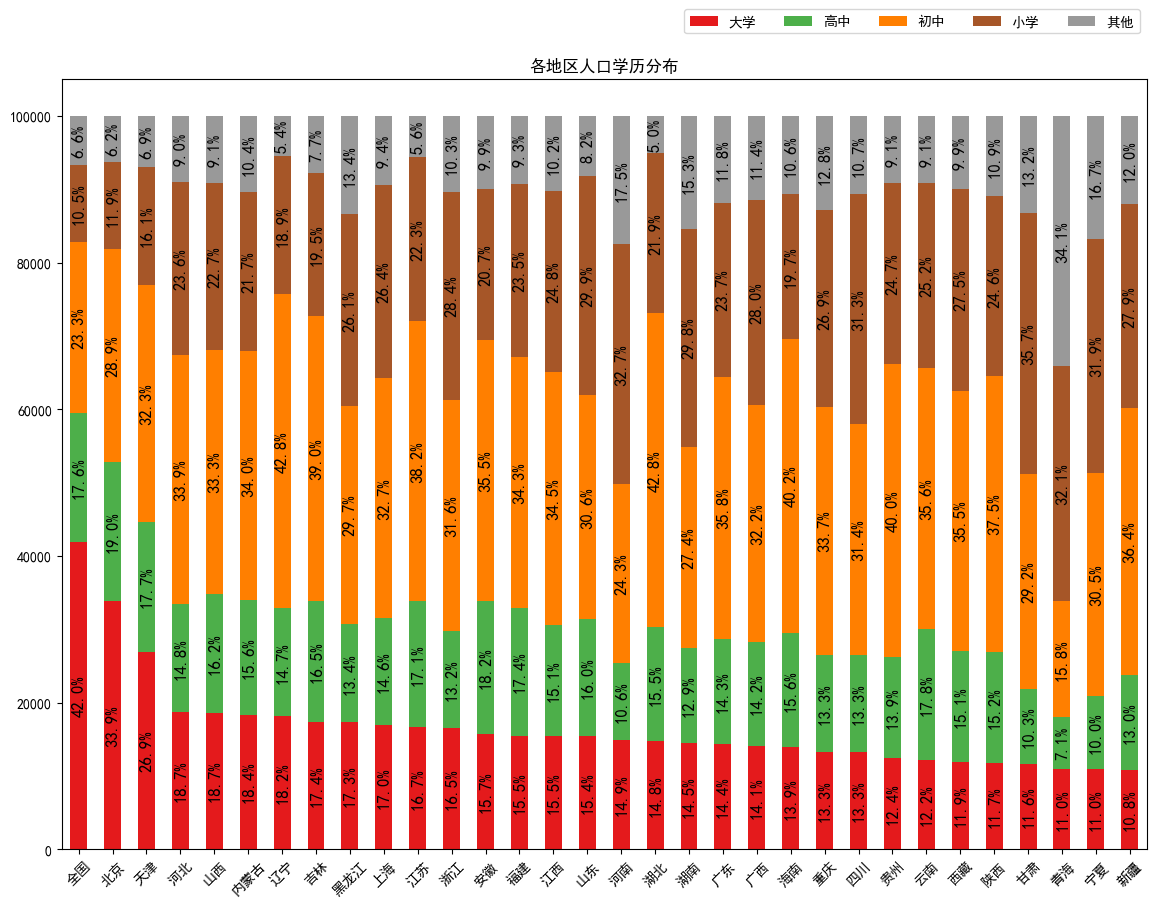

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']

fig, ax = plt.subplots(figsize=(14, 10))

#可视化
df_obj = edu_data.plot(
    kind = 'bar',
    stacked = True,
    colormap = 'Set1',
    ax = ax
)
for c in df_obj.containers:
    labels = [f'{int(v.get_height())/1000:.1f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels = labels, label_type = 'center', fontsize = 12, rotation = 90)

plt.title('各地区人口学历分布')

plt.xticks(edu_data.index, edu_data['地区'].values, rotation = 45)
plt.legend(bbox_to_anchor=(1,1.1), ncol = 10, facecolor = 'None', fontsize = 10)

plt.show()

Text(0, 0.5, '')

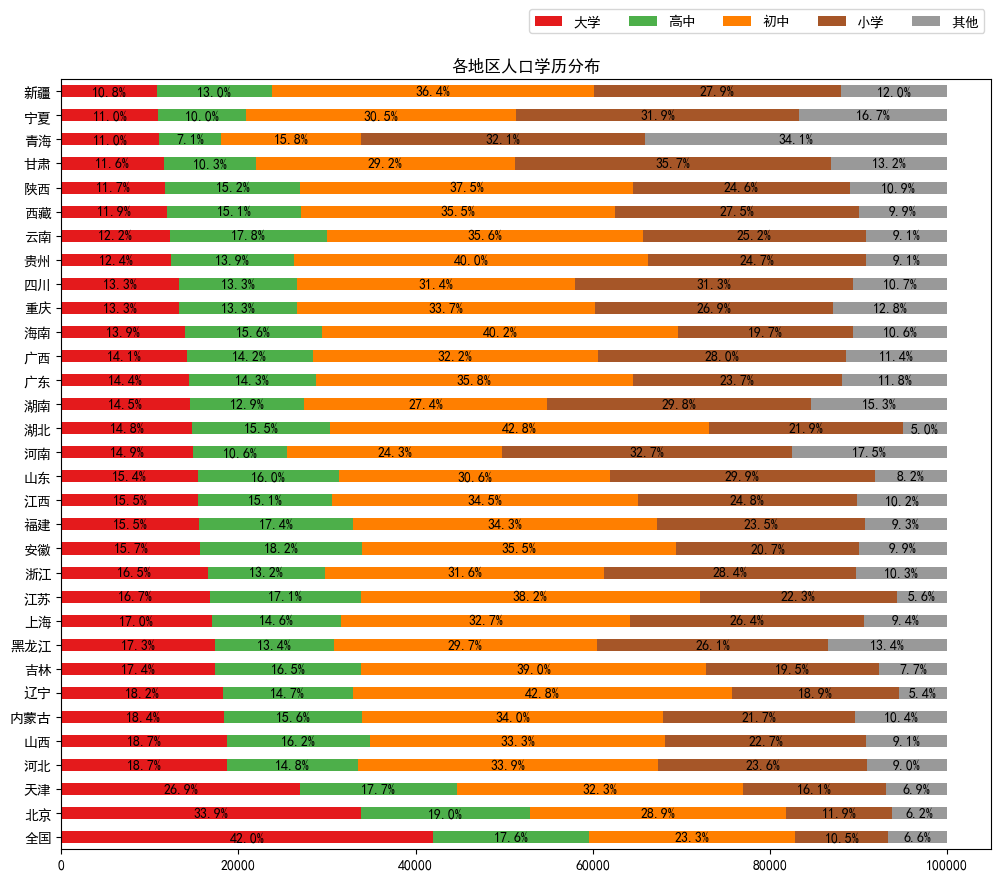

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))

#可视化
df_obj = edu_data.plot(
    kind = 'barh',
    stacked = True,
    colormap = 'Set1',
    ax = ax
)
for c in df_obj.containers:
    labels = [f'{int(v.get_width())/1000:.1f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels = labels, label_type = 'center', fontsize = 10)

plt.title('各地区人口学历分布')
plt.yticks(edu_data.index, edu_data['地区'].values)
plt.legend(bbox_to_anchor=(1,1.1), ncol = 10, facecolor = 'None', fontsize = 10)
plt.ylabel('')


## 直方图

In [8]:
fig = px.histogram(
    edu_data,
    x = '地区',
    y = ['大学', '高中', '初中', '小学', '其他'],
    barmode = 'group',
    width = 800, height = 600,
    title = '各地区人口大学比例',
    labels = {
        '地区': '地区',
        'variable': '学历',
    },
)
fig.update_layout(
    yaxis_title = '各学历人数',
    xaxis = {
        'tickangle': 45
    }
)

#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/各地区人口大学比例直方图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/各地区人口大学比例直方图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/各地区人口大学比例直方图.html')
    print('已保存')

fig.show()

## 玫瑰图

In [ ]:

display(edu_data.head())

newedu_data = edu_data.set_index(["地区"], inplace = False)

columns = newedu_data.columns.values #iloc[0,:].index.to_list()
values = newedu_data.values.sum(axis = 0)

#新建表
edu_new_df = pd.DataFrame(
    data = np.c_[values, columns],
    columns = ['人数', '学历']
)
#排序
edu_new_df.sort_values(by = '人数', ascending = False, inplace = True)
display(edu_new_df.head())

#可视化
fig = px.bar_polar(
    edu_new_df, 
    r='人数',
    theta='学历',
    color='学历',
    template='plotly_dark',
    height = 600,
    width = 600,
    title = '各地区人口大学比例玫瑰图',
)
#格式设置
fig.update_layout(
    polar = {
        'angularaxis':{
            'gridcolor' : 'rgb(255,255,255)',
            'linecolor' :  'rgb(255,255,255)',
            'showline' : False
        },
        'radialaxis':{
            'gridcolor' : 'rgb(255,255,255)',
            'linecolor' :  'rgb(255,255,255)',
            'showline' : False,
        }
    }
)

#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/各地区人口大学比例玫瑰图.html')

else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/各地区人口大学比例玫瑰图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/各地区人口大学比例玫瑰图.html')
    print('已保存')

fig.show()

地区     大学     高中     初中     小学    其他
1    北京  41980  17593  23289  10503  6635
9    上海  33872  19020  28935  11929  6244
2    天津  26940  17719  32294  16123  6924
5   内蒙古  18688  14814  33861  23627  9010
10   江苏  18663  16191  33308  22742  9096

人数  学历
2  1062836  初中
3   790592  小学
0   529651  大学
1   469099  高中
4   347822  其他

## 环形饼图 

In [ ]:
#可视化
fig = px.pie(
    edu_new_df,
    names = '学历',
    values = '人数',
    title = '各地区人口大学比例饼图',
    color_discrete_sequence = px.colors.sequential.RdBu,
    height = 600,
    width = 600,
    hole = 0.6,
    template = 'plotly_white'
)

#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/各地区人口大学比例饼图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/各地区人口大学比例饼图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/各地区人口大学比例饼图.html')
    print('已保存')

fig.show()

已保存


# 人口性别构成

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from pathlib import Path
from matplotlib import pyplot as plt
import plotly.express as px

plt.rcParams['font.sans-serif'] = ['SimHei']

In [5]:

data_gender = pd.read_excel(r"..\data\2020年各地区性别构成.xlsx")
data_gender.head()

地区   男性占比   女性占比     性别比
0  全 国  51.24  48.76  105.07
1  北 京  51.14  48.86  104.65
2  天 津  51.53  48.47  106.31
3  河 北  50.50  49.50  102.02
4  山 西  50.99  49.01  104.06

In [6]:
data_gender.isnull().sum()

地区      0
男性占比    0
女性占比    0
性别比     0
dtype: int64

In [7]:
data_gender['地区'] = data_gender['地区'].str.replace(' ', '')

## 条形图

In [20]:
fig = px.bar(
    data_gender,
    x="地区",
    y= ["男性占比", "女性占比"],
    height=600, width = 1000,
    title="人口性别占比条形图",
    
)

fig.update_layout(
    yaxis_title = '人口性别占比',
    xaxis = {
        'tickangle': 45
    },
    legend_title = '性别'
)
#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/人口性别构成条形图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/人口性别构成条形图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/人口性别构成条形图.html')
    print('已保存')

fig.show()

In [19]:
fig = px.bar(
    data_gender,
    y = "地区",
    x = ["男性占比", "女性占比"],
    height=800, width = 800,
    title="人口性别占比条形图",
    orientation = 'h',
    labels = {
        'value' : '人口性别占比',
    }
)

fig.update_layout(
    yaxis_title = '地区',
    xaxis = {
        'tickangle': 0
    },
    legend_title = '性别'
)

#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/人口性别构成竖向条形图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/人口性别构成竖向条形图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/人口性别构成竖向条形图.html')
    print('已保存')

fig.show()

## 直方图

In [22]:
data_gender.head()

地区   男性占比   女性占比     性别比
0  全国  51.24  48.76  105.07
1  北京  51.14  48.86  104.65
2  天津  51.53  48.47  106.31
3  河北  50.50  49.50  102.02
4  山西  50.99  49.01  104.06

In [23]:
fig = px.histogram(
    data_gender,
    x = '地区',
    y = ["男性占比", "女性占比"],
    barmode = 'group',
    width = 1000, height = 600,
    labels = {
        '地区': '地区',
        'variable': '性别比',
    },
)
fig.update_layout(
    yaxis_title = '占比',
    xaxis = {
        'tickangle': 45
    }
)

#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/人口性别构成直方图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/人口性别构成直方图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/人口性别构成直方图.html')
    print('已保存')

fig.show()

# 2020年各地区人口年龄构成

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from pathlib import Path
from matplotlib import pyplot as plt
import plotly.express as px

plt.rcParams['font.sans-serif'] = ['SimHei']

In [31]:
data_region_age = pd.read_excel(r"../data/2020年各地区人口年龄构成.xlsx")

In [32]:
data_region_age.head()

地区  0—14岁  15—59岁  60岁及以上  其中：65岁及以上
0  全 国  17.95   63.35   18.70      13.50
1  北 京  11.84   68.53   19.63      13.30
2  天 津  13.47   64.87   21.66      14.75
3  河 北  20.22   59.92   19.85      13.92
4  山 西  16.35   64.72   18.92      12.90

In [33]:
data_region_age.isnull().sum()

地区           0
0—14岁        0
15—59岁       0
60岁及以上       0
其中：65岁及以上    0
dtype: int64

In [34]:
data_region_age['地区'] = data_region_age['地区'].str.replace(' ', '')

# 条形图

Text(0, 0.5, '')

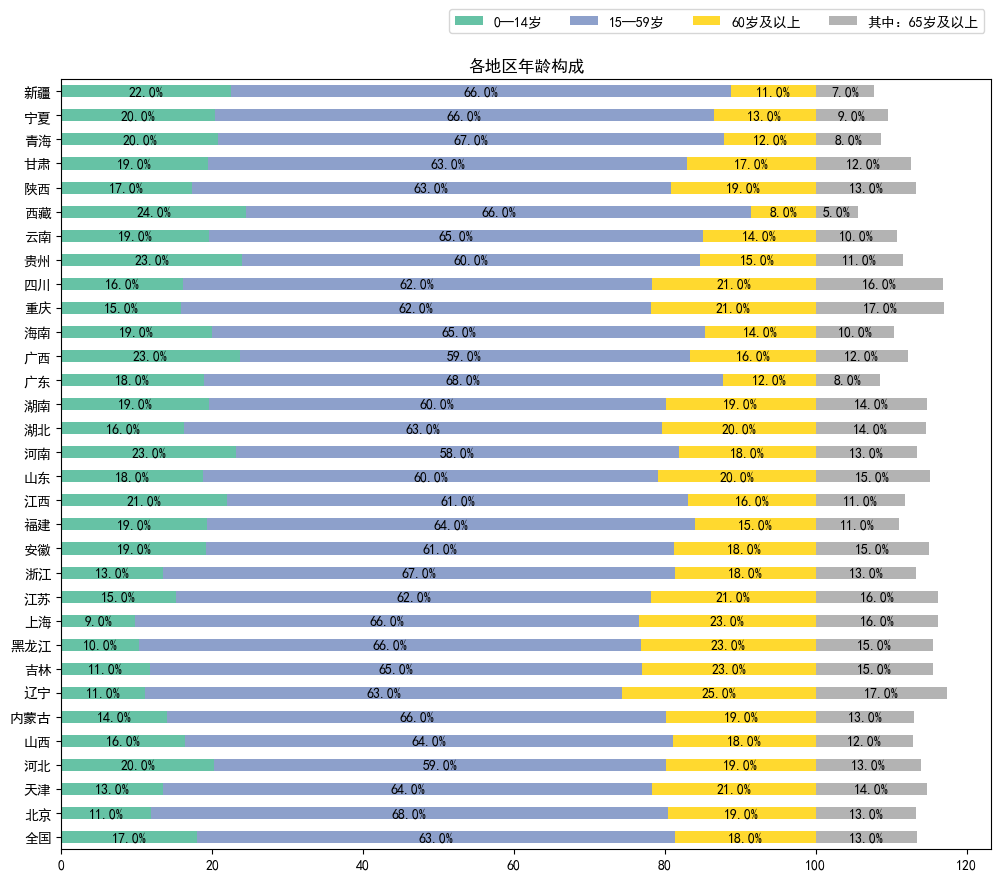

In [48]:
fig, ax = plt.subplots(figsize=(12, 10))

#可视化
df_obj = data_region_age.plot(
    kind = 'barh',
    stacked = True,
    colormap = 'Set2',
    ax = ax
)
for c in df_obj.containers:
    labels = [f'{int(v.get_width()):.1f}%' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels = labels, label_type = 'center', fontsize = 10, color = 'k')

plt.title('各地区年龄构成')
plt.yticks(data_region_age.index, data_region_age['地区'].values)
plt.legend(bbox_to_anchor=(1,1.1), ncol = 10, facecolor = 'None', fontsize = 10)
plt.ylabel('')

## 2020年全国人口年龄构成

In [51]:
df_age = pd.read_excel(r"..\data\2020年全国人口年龄构成.xlsx")
df_age

全国人口年龄构成          人数      比例
0         总计  1411778724  100.00
1      0—14岁   253383938   17.95
2     15—59岁   894376020   63.35
3     60岁及以上   264018766   18.70
4  其中：65岁及以上   190635280   13.50

In [79]:
new_age_data = df_age.iloc[1:4]
new_age_data.sort_values(by = ['比例'], ascending = False, inplace = True, ignore_index = True)
display(new_age_data.head())

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_58672\2622592843.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



全国人口年龄构成         人数     比例
0   15—59岁  894376020  63.35
1   60岁及以上  264018766  18.70
2    0—14岁  253383938  17.95

## 饼图

In [80]:
#可视化
fig = px.pie(
    new_age_data,
    names = '全国人口年龄构成',
    values = '人数',
    title = '2020年各地区人口年龄构成',
    hover_data = ['人数', '比例'],
    color_discrete_sequence = px.colors.sequential.RdBu,
    height = 600,
    width = 600,
    hole = 0.6,
    template = 'plotly_white'
)

#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/2020年各地区人口年龄构成饼图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/2020年各地区人口年龄构成饼图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/2020年各地区人口年龄构成饼图.html')
    print('已保存')

fig.show()

## 漏斗图

In [86]:
fig = px.funnel_area(
    new_age_data,
    values = "比例",
    names = "全国人口年龄构成",
    color_discrete_sequence = px.colors.sequential.Agsunset,
    height = 800,
    width = 800,
    template = 'plotly_white'
)
#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/2020年各地区人口年龄构成漏斗图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/2020年各地区人口年龄构成漏斗图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/2020年各地区人口年龄构成漏斗图.html')
    print('已保存')

fig.show()


# 2020年各地区人口

In [3]:
df_district = pd.read_excel(r"..\data\2020年各地区人口.xlsx")[1:]

df_district.sort_values(by = ["2020年占比", "2010年占比"], ascending=False, inplace=True)
df_district.iloc[:20]

地区        人口数  2020年占比  2010年占比
19  广 东  126012510     8.93     7.79
15  山 东  101527453     7.19     7.15
16  河 南   99365519     7.04     7.02
10  江 苏   84748016     6.00     5.87
23  四 川   83674866     5.93     6.00
3   河 北   74610235     5.28     5.36
18  湖 南   66444864     4.71     4.90
11  浙 江   64567588     4.57     4.06
12  安 徽   61027171     4.32     4.44
17  湖 北   57752557     4.09     4.27
20  广 西   50126804     3.55     3.44
25  云 南   47209277     3.34     3.43
14  江 西   45188635     3.20     3.33
6   辽 宁   42591407     3.02     3.27
13  福 建   41540086     2.94     2.75
27  陕 西   39528999     2.80     2.79
24  贵 州   38562148     2.73     2.59
4   山 西   34915616     2.47     2.67
22  重 庆   32054159     2.27     2.15
8   黑龙江   31850088     2.26     2.86

## 直方图

In [4]:
fig = px.histogram(
    df_district,
    x = '地区',
    y = ["2020年占比", "2010年占比"],
    barmode = 'group',
    width = 1000, height = 600,
    labels = {
        '地区': '地区',
        'variable': '占比',
    },
    color_discrete_sequence = px.colors.sequential.Rainbow
)
fig.update_layout(
    yaxis_title = '各地区2020/2010占比',
    xaxis = {
        'tickangle': 45
    }
)

#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/2020年各地区人口直方图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/2020年各地区人口直方图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/2020年各地区人口直方图.html')
    print('已保存')

fig.show()

## 中国2020年各地区人口数量分布地图

In [5]:
df_district.iloc[:8]

df_district.isnull().sum()

df_district.dropna(how = 'any', inplace = True) 

df_district.isnull().sum()

地区         0
人口数        0
2020年占比    0
2010年占比    0
dtype: int64

In [6]:
#查看数据类型
display(df_district.dtypes)

#转换数据类型
df_district['人口数'] = df_district['人口数'].astype('float64')

df_district.dtypes

地区          object
人口数          int64
2020年占比    float64
2010年占比    float64
dtype: object

地区          object
人口数        float64
2020年占比    float64
2010年占比    float64
dtype: object

In [7]:
df_district_copy = df_district.copy()
df_district_copy['地区'] = df_district_copy['地区'].apply(lambda x: x[0] + x[2] if x[1] == ' '  else x)
df_district_copy

地区          人口数  2020年占比  2010年占比
19   广东  126012510.0     8.93     7.79
15   山东  101527453.0     7.19     7.15
16   河南   99365519.0     7.04     7.02
10   江苏   84748016.0     6.00     5.87
23   四川   83674866.0     5.93     6.00
3    河北   74610235.0     5.28     5.36
18   湖南   66444864.0     4.71     4.90
11   浙江   64567588.0     4.57     4.06
12   安徽   61027171.0     4.32     4.44
17   湖北   57752557.0     4.09     4.27
20   广西   50126804.0     3.55     3.44
25   云南   47209277.0     3.34     3.43
14   江西   45188635.0     3.20     3.33
6    辽宁   42591407.0     3.02     3.27
13   福建   41540086.0     2.94     2.75
27   陕西   39528999.0     2.80     2.79
24   贵州   38562148.0     2.73     2.59
4    山西   34915616.0     2.47     2.67
22   重庆   32054159.0     2.27     2.15
8   黑龙江   31850088.0     2.26     2.86
31   新疆   25852345.0     1.83     1.63
28   甘肃   25019831.0     1.77     1.91
9    上海   24870895.0     1.76     1.72
7    吉林   24073453.0     1.71     2.05
5   内蒙古   24049155.0     1.70     1.84
1    北京   21893095.0     1.55     1.46
2    天津   13866009.0     0.98     0.97
21   海南   10081232.0     0.71     0.65
30   宁夏    7202654.0     0.51     0.47
29   青海    5923957.0     0.42     0.42
26   西藏    3648100.0     0.26     0.22

In [8]:
new_data = df_district_copy.iloc[:32,:]
new_data

地区          人口数  2020年占比  2010年占比
19   广东  126012510.0     8.93     7.79
15   山东  101527453.0     7.19     7.15
16   河南   99365519.0     7.04     7.02
10   江苏   84748016.0     6.00     5.87
23   四川   83674866.0     5.93     6.00
3    河北   74610235.0     5.28     5.36
18   湖南   66444864.0     4.71     4.90
11   浙江   64567588.0     4.57     4.06
12   安徽   61027171.0     4.32     4.44
17   湖北   57752557.0     4.09     4.27
20   广西   50126804.0     3.55     3.44
25   云南   47209277.0     3.34     3.43
14   江西   45188635.0     3.20     3.33
6    辽宁   42591407.0     3.02     3.27
13   福建   41540086.0     2.94     2.75
27   陕西   39528999.0     2.80     2.79
24   贵州   38562148.0     2.73     2.59
4    山西   34915616.0     2.47     2.67
22   重庆   32054159.0     2.27     2.15
8   黑龙江   31850088.0     2.26     2.86
31   新疆   25852345.0     1.83     1.63
28   甘肃   25019831.0     1.77     1.91
9    上海   24870895.0     1.76     1.72
7    吉林   24073453.0     1.71     2.05
5   内蒙古   24049155.0     1.70     1.84
1    北京   21893095.0     1.55     1.46
2    天津   13866009.0     0.98     0.97
21   海南   10081232.0     0.71     0.65
30   宁夏    7202654.0     0.51     0.47
29   青海    5923957.0     0.42     0.42
26   西藏    3648100.0     0.26     0.22

In [9]:
#绘制中国地图
import geojson
with open(r'../data/geodata.json', encoding='utf-8') as f:
    geojson_data = geojson.load(f)

fig = px.choropleth(
    new_data,
    geojson = geojson_data,
    locations = '地区',
    color = '人口数',
    featureidkey = 'properties.name',
    color_discrete_sequence = px.colors.sequential.RdBu,
    hover_data = ['人口数', '2020年占比', '2010年占比'],
    width = 1600,
    height = 1000
)

#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/2020中国地图各地区人口.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/2020中国地图各地区人口.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/2020中国地图各地区人口.html')
    print('已保存')

fig.show()

## 2010年各地区分性别的人口数据

In [10]:
p2010 =pd.read_excel(r'..\data\2010年各地区分性别的人口数据.xlsx')

p2010 = p2010.iloc[1:,:]

p2010.head()

Unnamed: 0        合计         男         女      小计
1        北 京  19612368  10126430   9485938  115882
2        天 津  12938693   6907091   6031602   81871
3        河 北  71854210  36430286  35423924  880194
4        山 西  35712101  18338760  17373341  345782
5      内 蒙 古  24706291  12838243  11868048  204151

In [11]:
p2010 = p2010.rename(columns = {'Unnamed: 0':'地区', '合计' : '2010人口数'})
p2010['地区'] = p2010['地区'].str.replace(' ', '')
p2010.head()

地区   2010人口数         男         女      小计
1   北京  19612368  10126430   9485938  115882
2   天津  12938693   6907091   6031602   81871
3   河北  71854210  36430286  35423924  880194
4   山西  35712101  18338760  17373341  345782
5  内蒙古  24706291  12838243  11868048  204151

In [12]:
new_data.rename(columns={'人口数': '2020人口数'}, inplace=True)

#表连接
df_2010_2020 = new_data.merge(right = p2010, how = 'right', on = '地区')
df_2010_2020.head()

地区     2020人口数  2020年占比  2010年占比   2010人口数         男         女      小计
0   北京  21893095.0     1.55     1.46  19612368  10126430   9485938  115882
1   天津  13866009.0     0.98     0.97  12938693   6907091   6031602   81871
2   河北  74610235.0     5.28     5.36  71854210  36430286  35423924  880194
3   山西  34915616.0     2.47     2.67  35712101  18338760  17373341  345782
4  内蒙古  24049155.0     1.70     1.84  24706291  12838243  11868048  204151

In [13]:
display(df_2010_2020.dtypes)
df_2010_2020['2010人口数'] = df_2010_2020['2010人口数'].astype('float64')

df_2010_2020['10年增长数'] = df_2010_2020['2020人口数'] - df_2010_2020['2010人口数']
df_2010_2020.head()

地区          object
2020人口数    float64
2020年占比    float64
2010年占比    float64
2010人口数      int64
男            int64
女            int64
小计           int64
dtype: object

地区     2020人口数  2020年占比  2010年占比     2010人口数         男         女      小计  \
0   北京  21893095.0     1.55     1.46  19612368.0  10126430   9485938  115882   
1   天津  13866009.0     0.98     0.97  12938693.0   6907091   6031602   81871   
2   河北  74610235.0     5.28     5.36  71854210.0  36430286  35423924  880194   
3   山西  34915616.0     2.47     2.67  35712101.0  18338760  17373341  345782   
4  内蒙古  24049155.0     1.70     1.84  24706291.0  12838243  11868048  204151   

      10年增长数  
0  2280727.0  
1   927316.0  
2  2756025.0  
3  -796485.0  
4  -657136.0

In [14]:
df_2010_2020.sort_values(by=['10年增长数'], inplace=True, ascending = False)
df_2010_2020.head()

地区      2020人口数  2020年占比  2010年占比      2010人口数         男         女  \
18  广东  126012510.0     8.93     7.79  104320459.0  54400538  49919921   
10  浙江   64567588.0     4.57     4.06   54426891.0  27965641  26461250   
9   江苏   84748016.0     6.00     5.87   78660941.0  39626707  39034234   
14  山东  101527453.0     7.19     7.15   95792719.0  48446944  47345775   
15  河南   99365519.0     7.04     7.02   94029939.0  47493063  46536876   

         小计      10年增长数  
18  1081126  21692051.0  
10   443261  10140697.0  
9    683985   6087075.0  
14   980428   5734734.0  
15  1043852   5335580.0

## 柱形图

In [230]:
fig = px.bar(
    df_2010_2020,
    x = '地区',
    y = '10年增长数',
    color = '10年增长数',
    color_discrete_sequence = px.colors.sequential.RdBu,
    height = 800,
    width = 1200,
    template = 'plotly_dark'
)
fig.update_layout(
    xaxis = {
        'tickangle': 45
    }
)
#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/2010年-2020各地区人口数对比柱状图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/2010年-2020各地区人口数对比柱状图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/2010年-2020各地区人口数对比柱状图.html')
    print('已保存')
fig.show()

# 2020年和2010年各地区15岁及以上人口平均受教育年限

In [2]:
import plotly.io as pio 
df_edu_time=pd.read_excel(r"..\data\2020年各地区15岁及以上人口平均受教育年限.xlsx")
df_edu_time.head()

地区  2020年平均年限  2010年平均年限
0  全 国       9.91       9.08
1  北 京      12.64      11.71
2  天 津      11.29      10.38
3  河 北       9.84       9.12
4  山 西      10.45       9.52

In [3]:
df_edu_time.isnull().sum()

地区           0
2020年平均年限    0
2010年平均年限    0
dtype: int64

## 柱状图

In [4]:
fig = px.bar(
    df_edu_time,
    x = '地区',
    y = ['2020年平均年限', '2010年平均年限'],
    color = None,
    color_discrete_sequence = px.colors.sequential.RdBu,
    height = 800,
    width = 1200,
    template = 'plotly_dark',
    barmode = 'group'
)
fig.update_layout(
    xaxis = {
        'tickangle': 45
    }
)
#保存为HTML文件
if Path('./Plot_figure').exists():
    fig.write_html('./Plot_figure/2020年各地区15岁及以上人口平均受教育年限柱状图.html')
else:
    Path('./Plot_figure').mkdir()
    if Path('./Plot_figure/2020年各地区15岁及以上人口平均受教育年限柱状图.html').exists():
        print('已存在')
    fig.write_html('./Plot_figure/2020年各地区15岁及以上人口平均受教育年限柱状图.html')
    print('已保存')


fig.show()

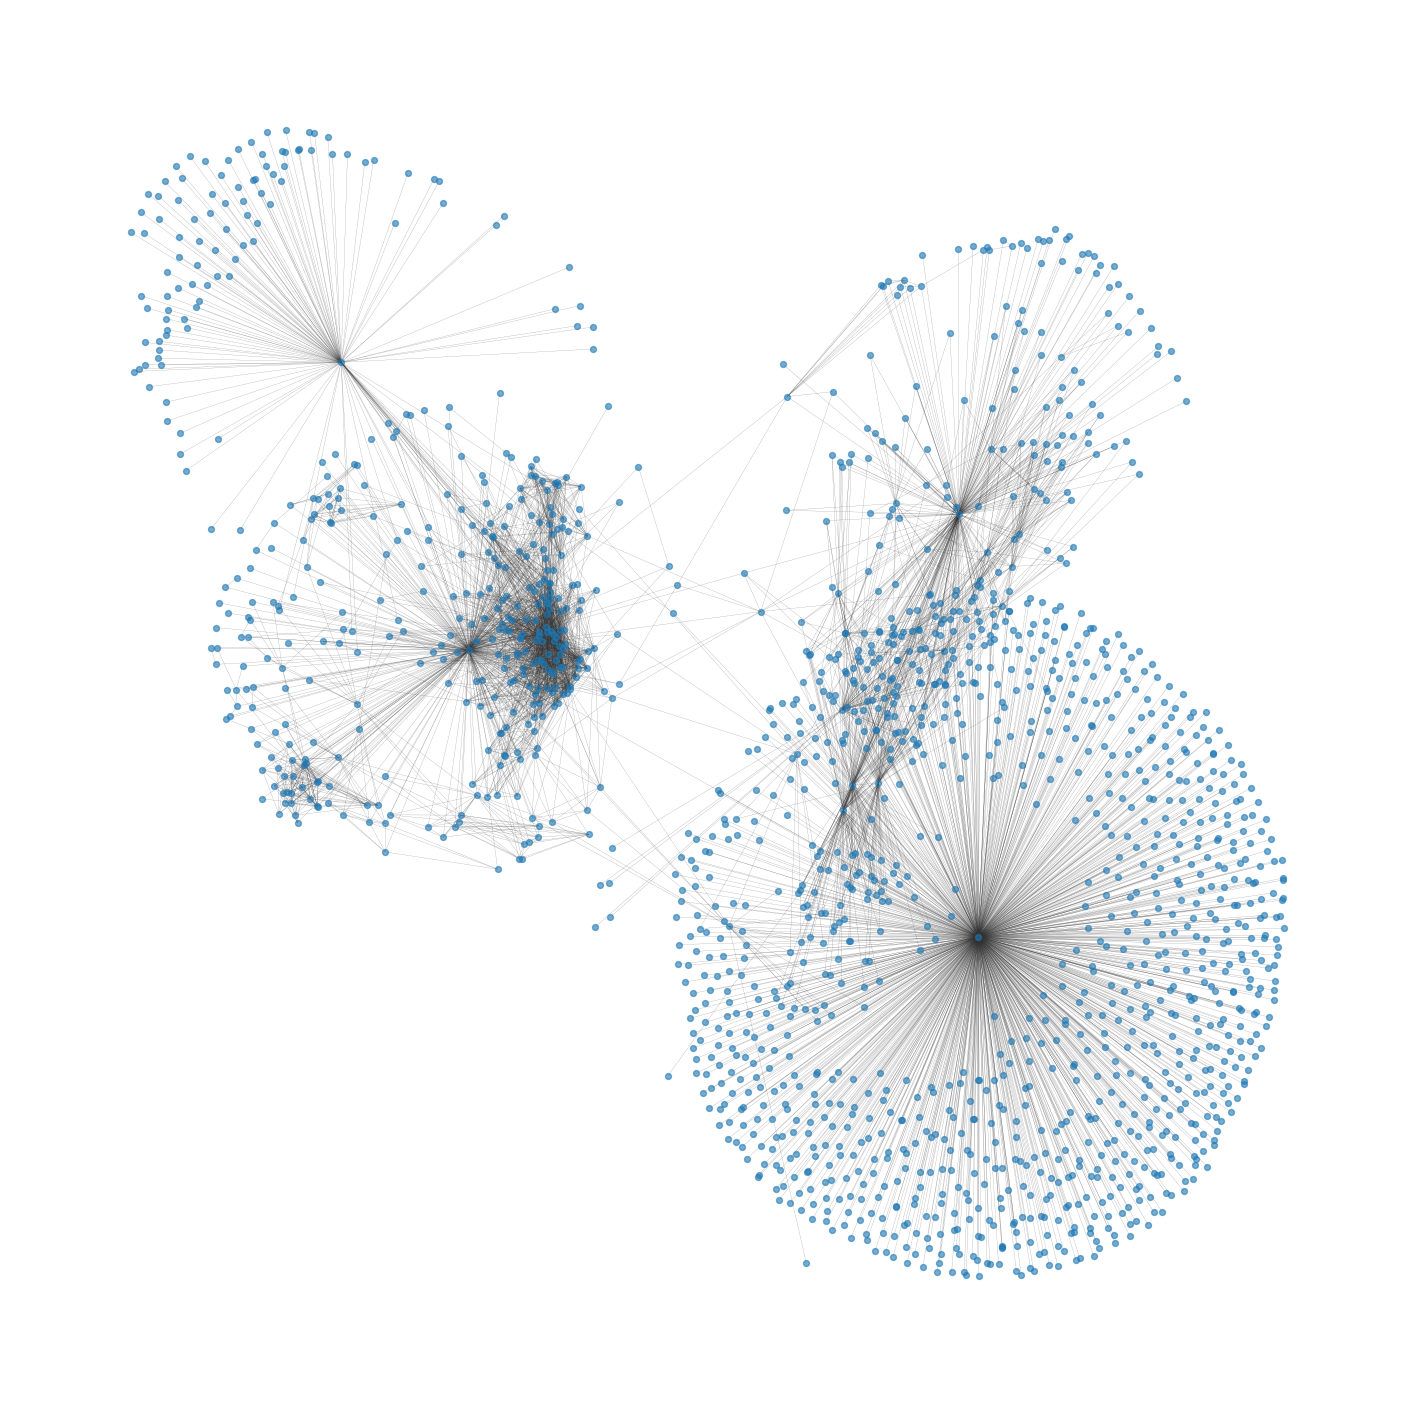

In [3]:
import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'none'

facebook = pd.read_csv(
        "../data/facebook_combined.txt.gz",
        compression="gzip",
        sep=" ",
        names=["start_node", "end_node"]
    )
G = nx.from_pandas_edgelist(facebook.head(5000), "start_node", "end_node")

plot_options = {"node_size": 18, 
            "with_labels": False, 
            "width": 0.15, 
            "edge_color": '0.18',
            "alpha": 0.6}

pos = nx.spring_layout(G, iterations=15, seed=1721)

fig, ax = plt.subplots(figsize=(18, 18))
# ax.set_facecolor('none')
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

fig.savefig(r'./Plot_figure/social_networks.svg')